# Setup

In [5]:
import numpy as np
import openai
import llmlex
import matplotlib.pyplot as plt
import time

In [6]:
funcs = [lambda x: (np.abs(np.sin(x))**0.5),
            lambda x: np.exp(( 1.83169 + (-3.35509 * (1 / x)))),
            lambda x: (x**3.),
            lambda x: ((1.44439 + (x**0.5)) * (np.pi + np.log(x))),
            lambda x: (3.09529 * (x**3.)),
            lambda x: ((np.pi + (x**3.))**2),
            lambda x: (51.2288 * np.cos((1.18219 * x))),
            lambda x: (-55.0512 * (1.0+(x**0.5))),
            lambda x: x,
            lambda x: (-0.0126997 + np.exp(np.cos(x))),
            lambda x: (1.54251 + (-1. * x)),
            lambda x: ((np.exp(2*x))),
            lambda x: (4.01209 + np.exp(x)),
            lambda x: ((-1. * np.pi) + (0.729202 * (x**0.5))),
            lambda x: (1.99594 + x + (-3. * ( x**3.))),
            lambda x: np.log(x+1),
            lambda x: np.sin(np.log((4.1746 * (1 / x)))),
            lambda x: (4.67315 + np.cos(np.exp(x))),
            lambda x: np.exp((-x))+2*np.exp(-3*x),
            lambda x: ((x**-3.) * np.sin(x))
            ]

print(len(funcs))

20


In [7]:
model = "mistral"

client = openai.OpenAI(
    base_url="http://0.0.0.0:11434/v1",
    api_key="ollama" # This can be any non-empty string
)

# Run 1

## Search

In [8]:
xVals = np.linspace(0.1, 5, 100)
count = 0
population_size = 25
num_of_generations = 10
res_list = []

# only finish this block if 'results_{model}.pkl' does not exist
try:
    import pickle
    with open(f"results_{model}.pkl", 'rb') as f:
        res_list, compute_times = pickle.load(f)
    print("Results already computed. Exiting.")
    
except FileNotFoundError:
    print("Results not found. Proceeding with computation.")

    compute_times = []
    for func in funcs:
        start_time = time.time()
        print(f"Function {count}")
        count+=1
        y = func(xVals)
        fig, ax = plt.subplots()
        plt.xticks([xVals[0], xVals[-1]], ['%2.f' % xVals[0], '%2.f' % xVals[-1]])
        plt.yticks([min(y), max(y)], ['%2.f' % min(y), '%2.f' % max(y)])
        base64_image = llmlex.images.generate_base64_image(fig, ax, xVals, y)
        plt.show()
        if 'gpt' in model: start = llmlex.llm.check_key_limit(client)
        res = llmlex.run_genetic(client, base64_image, xVals, y, population_size,num_of_generations, 
                                temperature=1., model=model, system_prompt=None, elite=True, use_async=True, exit_condition=1e-7)
        res_list.append(res)
        compute_times.append(time.time() - start_time)
        if 'gpt' in model: print(f"Credits spent: {start - llmlex.llm.check_key_limit(client)}")


Results already computed. Exiting.


## Compare

Function 0
(params[0]*np.sinh(params[1]*x) + params[2])*(params[3]*np.cos(params[4]*x)+params[5])*np.exp(-params[6]*x - params[7]*x**2 + params[25]*np.cos(params[26]*x)) + params[8]*(params[9]*np.sin(params[10]*x) + params[11]*np.cos(params[12]*x)) - params[13]/((params[14] + x)**2 + params[15]) + (params[16]*(params[17]*np.exp(-params[18] * (x**3) + params[27]*x) + params[19]*params[20]*np.tanh(params[21]*x)) - params[22]*abs(params[31]*x + params[32])) + params[33]*(params[34]*x + params[35]) * np.exp(-params[36]*x) + (params[37] * np.exp(-params[38] * x) + params[39] * (np.exp(params[40] * x) - 1)) + params[41] * np.sin(params[42] * (x**params[43])) + params[-3] * np.cos(params[44] * (x**params[45]))
[ 2.23514604e-01 -1.51007332e-01  1.36369391e-01  1.12104839e-01
  2.52365994e+00  1.68592346e-01 -8.39542668e+00  2.27431305e+00
  1.52520203e+00  1.69437910e+00  1.89412078e+00  5.42998483e-01
 -1.77908458e-02  5.67396292e+00 -7.12831122e-01  1.18970094e+00
 -2.87365872e+00  1.6868731

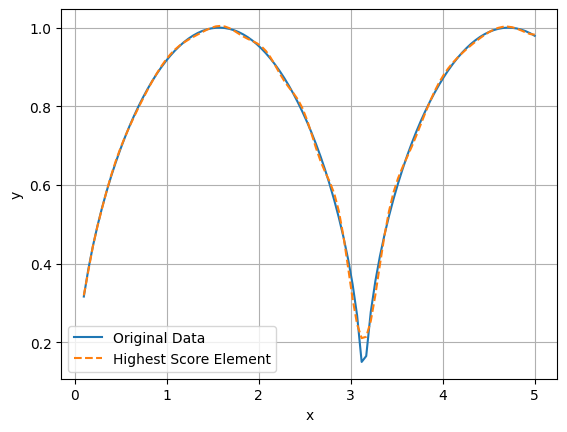

Function 1
(params[0]*np.sin(params[1]*x + params[2]) + params[3]*np.tanh(params[4]*x + params[5])) + (params[6]*x + params[7]**2) + params[8]/x + np.cos(params[9]*x + params[10])
[ 7.00631811e-01  1.21724331e+00  4.08075692e-01 -5.14185326e-01
  1.71700079e+00 -6.39740231e-01  7.01196914e-01  3.92326341e-01
  9.05593116e-04  1.10954241e+00  2.40692090e+00]
-1.3124711095713337e-08


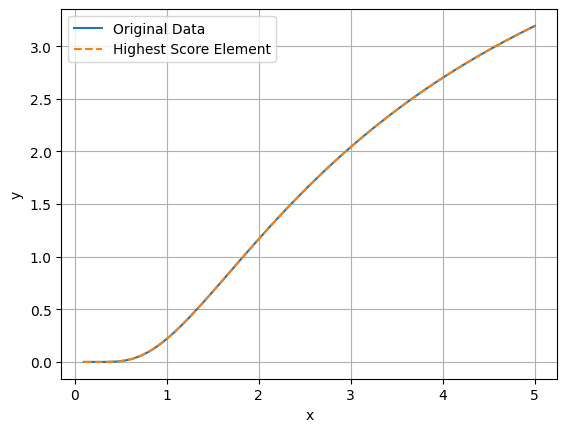

Function 2
params[0] + params[1]*np.exp(-params[2]*x) + params[3]*x**params[4]
[-8.10732595e-08  4.50595759e-08 -6.28322032e-01  9.99999991e-01
  3.00000000e+00]
-6.191900283332668e-19


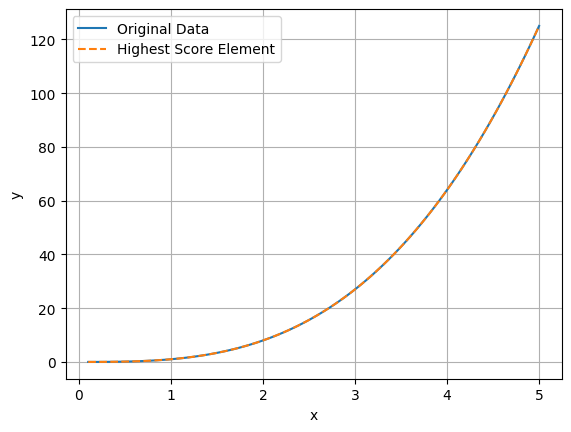

Function 3
(params[0]*np.sin(params[1]*x+params[2])+params[3]*x**params[4] - params[5]*np.exp(-params[6]*x) + params[7]*np.log(x+1)**params[8]) + params[9]*np.cos(params[10]*x+params[11]) + params[12]*(x**params[13]) - params[14]*np.exp(-params[15]*x**2) + params[16]*np.log(x+1)**params[17]**2
[ 5.10178812e-01  2.58478372e-01  9.01895591e-01  3.65643882e+00
  6.48385174e-01  7.44478718e-01  7.18581470e-01 -4.53532106e+00
 -1.08176090e-01 -1.41162210e-03  1.04715139e+00  1.14931134e+00
  8.60543477e+00  1.02992102e-01 -3.79366874e-04  7.20762916e-01
  1.07690693e-01  1.86194154e+00]
-1.4404918579331224e-17


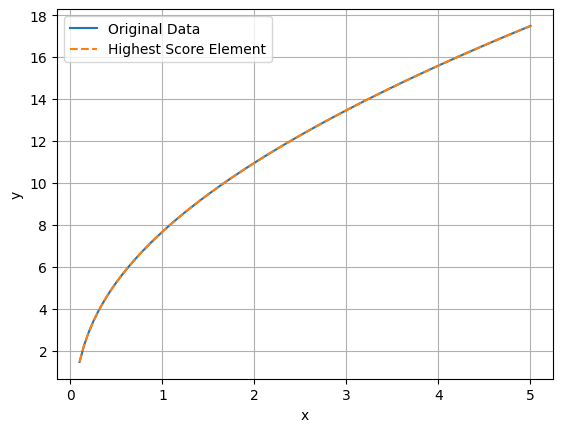

Function 4
params[0]*np.exp(-params[1]*x) + params[2]*x**3
[-3.49398183e-12  1.56412638e+00  3.09529000e+00]
-2.5258518257565128e-28


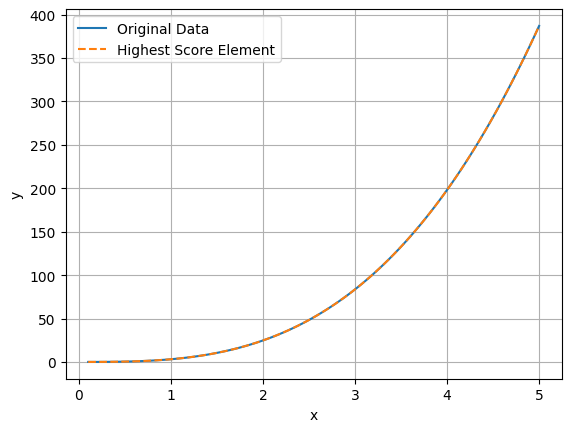

Function 5
params[0] * np.exp(-params[1] * x**2 - params[2] * x) + params[3] * np.sin(params[4] * x + params[5]) + params[6] * (np.cos(params[7] * x + params[8]) ** 2) + params[9] * (x ** params[10])
[ 5.34708649  0.03013787 -1.27924272  6.09950368  1.70577661  2.30175398
  2.91571923  1.03900487  4.69397455  1.03393118  5.95036295]
-8.810565124695025e-12


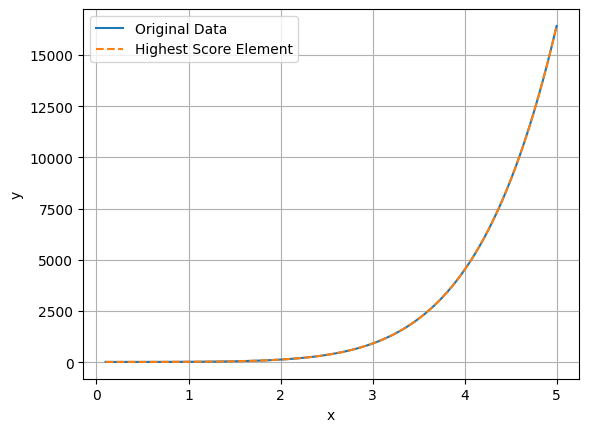

Function 6
np.polyval(params[:6], x) + params[6] * np.cos(params[7]*x) + params[8] * (np.exp(params[9]*x))
[-4.07273048e-07  2.19923963e-05 -7.45823428e-04  1.84841311e-02
 -3.05108211e-01  2.51827053e+00  5.12288018e+01  1.18219000e+00
 -2.51827231e+00 -1.21157819e-01]
-4.567156179279717e-21


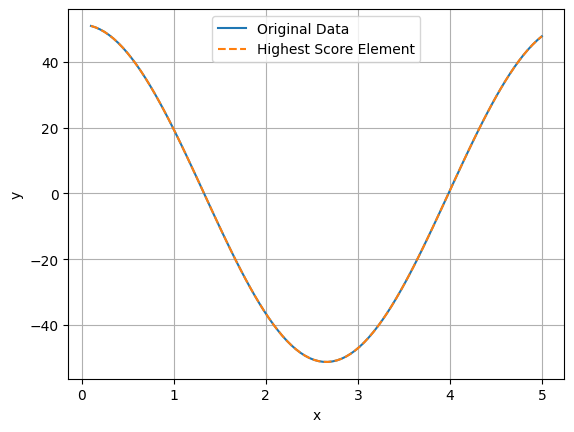

Function 7
params[0]*(np.sin(params[1]*x) + params[2]) + params[3]*x**params[4] - params[5]*(np.log(x+1)**params[6]) + params[7]*np.exp(-params[8]*x)
[-6.40273420e-07  2.10269532e+00 -1.84727190e+01 -5.50510511e+01
  4.99998023e-01 -4.32859379e-05  3.31138287e+00 -5.50511573e+01
 -3.91892023e-06]
-6.740548566162323e-17


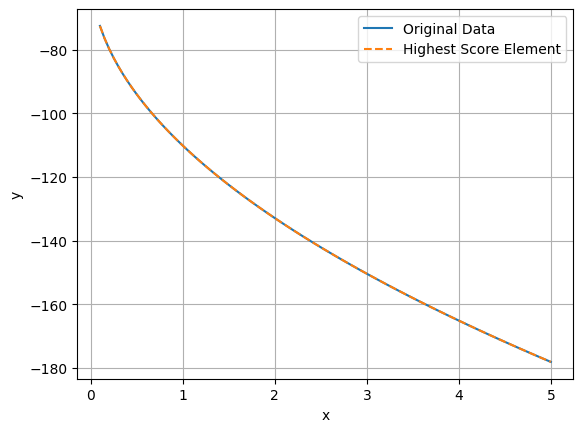

Function 8
params[1]*(np.cosh(params[2]*x)) + params[3]*x + params[4]*np.exp(-params[5]*x)
[ 1.00000000e+00 -5.29582643e-09  3.55670740e-01  1.00000000e+00
  6.65030711e-09  1.07904911e+00]
-1.3503196172287674e-19


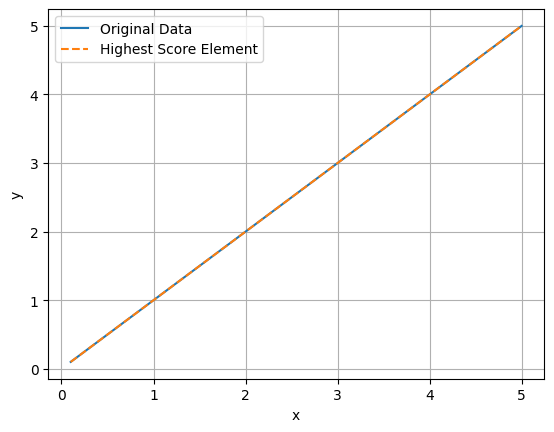

Function 9
(np.exp(-params[0]*x)*params[1]*np.cos(params[2]*x) + params[3]*np.sin(params[4]*x))*(params[5]*(x**3 + 1) + params[6]*x**2 + params[7]*x + params[8]) - (params[9]*np.tanh(params[10]*x + params[11]) + params[12]*np.sin(params[13]*x))**params[14] + params[15]
[ 5.71821321 -0.0100129   2.26330302  0.59842308  0.99996249 -0.24277897
  2.28788371 -3.12626677 -4.98783938  5.29061821  3.30919753  9.82660353
 -1.84921855  1.50001537  1.07793795  8.67708586]
-6.215025022404674e-11


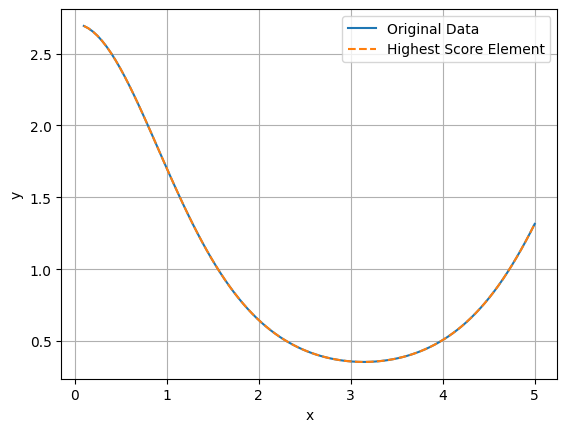

Function 10
params[0] + (params[1]*x+params[2])/(params[3]+params[4]*np.sin(params[5]*x))
[-7.63756040e-01 -2.23289060e+02  5.14963975e+02  2.23289060e+02
 -4.51050787e-09  7.92067280e-01]
-5.280682660344099e-21


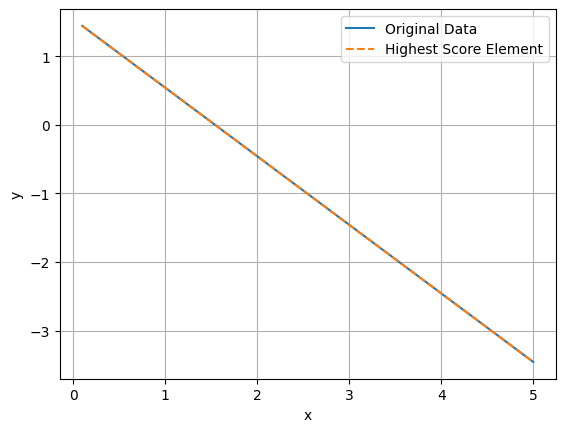

Function 11
np.exp(-params[0]*x) + params[1] * ( np.tanh((params[2]*(params[3] - x))) - params[3]/(np.tanh(params[4]*(x-params[5]))+ 1))
[-2.00000000e+00  3.57869356e-11 -2.55567571e+01  7.34411795e+00
  2.15323138e-01  2.78393281e-01]
-1.7540598328906025e-24


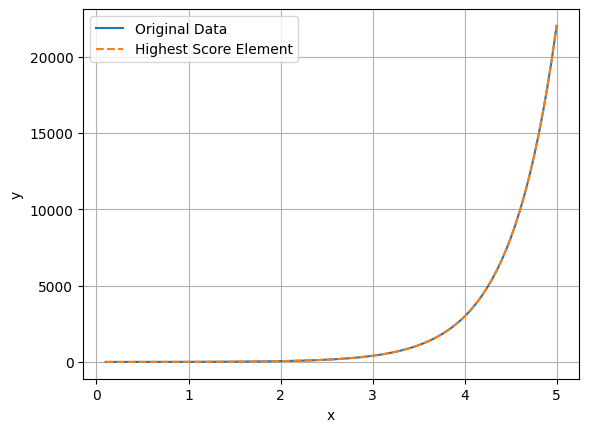

Function 12
params[1]*np.exp(params[2]*x + params[3]) - params[0]
[-4.01209     0.49238386  1.          0.70849667]
-3.167055671298984e-31


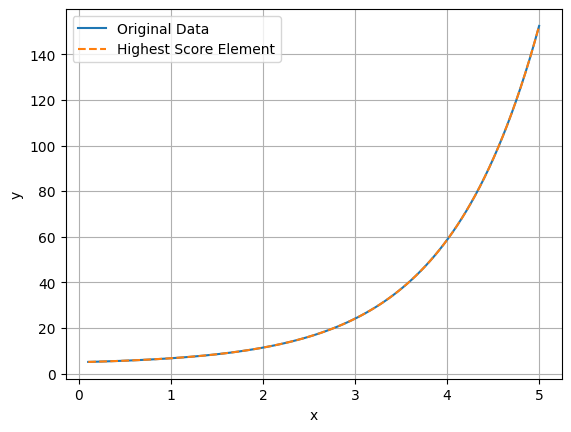

Function 13
(params[0] + params[1]*x)*(params[2] + params[3]*np.cos(params[4]*x) + params[5]*np.sin(params[6]*x))*(params[7] + params[8]*np.tanh(params[9]*x + params[10]))*(params[11]/x + params[12]**x)*(1 + np.exp(-params[13]*(x - params[14]))) + np.sqrt(params[15] + (x - params[16])**2) + params[17]/x
[ 1.10212931e+00  2.00710017e-01 -2.00986551e+00 -1.88671156e-04
  2.51766200e+00  3.10419633e-03  1.21296554e+00  1.15323241e+00
  4.68704158e-01  1.43422059e+00  4.21514584e+00 -1.70545162e+00
  1.01810310e+00  3.00996892e+00 -9.42728095e-01  5.11890421e-01
  9.59309111e-02 -6.48847664e+00]
-2.927278641706721e-09


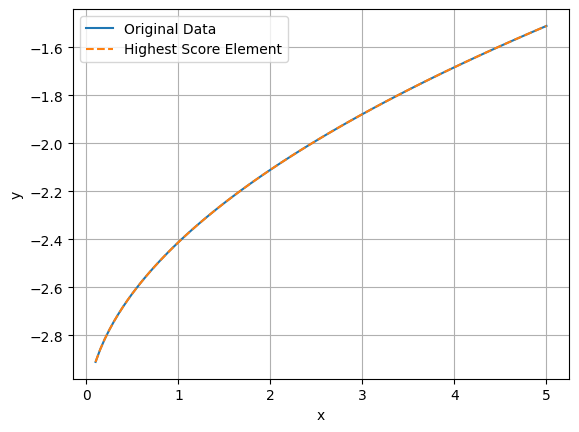

Function 14
params[0] + params[1]*np.cos(params[2]*x + params[3]) + params[4]*x**params[5]
[ 0.93364744 -2.03239591  0.62421565  2.11372829 -2.80726688  3.02942351]
-7.466448015414073e-10


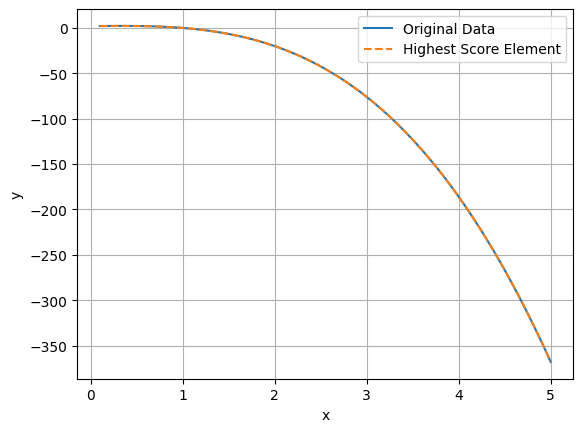

Function 15
params[0] - params[1]*np.log(x+1) + params[2]*np.sinh(params[3]*x)**2 + params[4]*np.cos(params[5]*x)*np.exp(-params[6]*x**2) + params[7]*np.sqrt(x+1)
[-3.76754154e-08 -9.99999952e-01 -1.00408055e-12  9.90564530e-01
 -1.07751698e-08  7.08432736e-01  1.37591361e+00  5.19204348e-08]
-2.316084208452551e-18


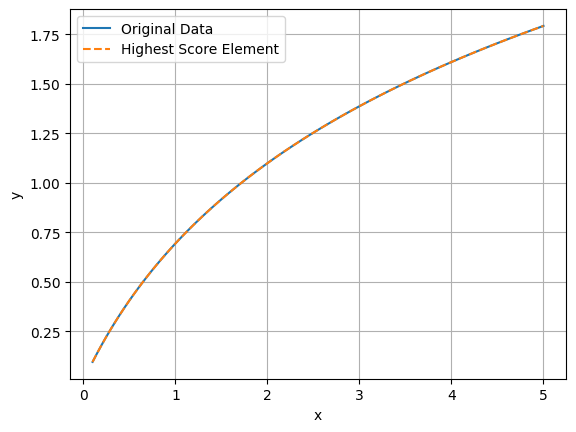

Function 16
params[0] + params[1]*x + params[2]*x**2 + params[3]*np.sin(params[4]*x) + params[5]*np.cos(params[6]*x) + params[7]*x**3 + params[8]*np.exp(-params[9]*x) + params[10]*(1/x + np.log(x)) + params[11]*np.sin(params[12]*np.log(x)) + params[13]*np.cos(params[14]*np.log(x))
[-5.26333815e+00  1.27503635e-01 -1.53734174e-03 -2.98846867e-07
  1.06168471e+00  4.97125404e-06  7.60347395e-01  1.12153755e-05
  5.26335934e+00  2.42291960e-02 -6.89158389e-07 -1.41282905e-01
  1.00004243e+00  9.89959438e-01  9.99999285e-01]
-2.1087764101296645e-18


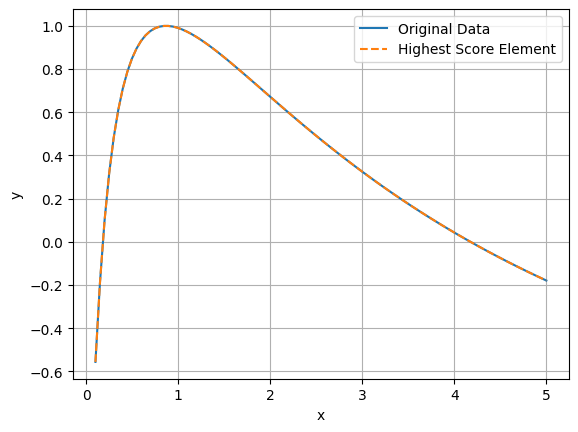

Function 17
(params[0] * x + params[1] * np.cos(params[2]) + params[3] * np.sin(params[4] * x) + params[5] * x**2 + params[6] * np.sin(params[7] * x)**2 - params[8] * x**4 + params[9] * np.exp(params[10] * x) * (1 - x**2)) ** 2 + params[11] * np.cos(params[12] * x) + params[13] * np.sin(params[14] * x) + params[15] * x**3 + params[16] * (params[17] * x + params[18]) ** 2 * params[19] * (np.cos(params[20] * x) + params[21]) - params[22] * np.exp(-params[23] * (x - params[24])) + params[25] * ((params[26] * x + params[27] * np.sin(params[28] * x)) ** 2 + params[29] * np.cos(params[30] * x) - params[31] * x**4)
[ 1.94547006e-01  6.69969904e+00  1.10133318e+01  3.75704797e-01
  8.12741911e+00 -1.57349706e-01  1.86346921e-01 -2.41453875e+01
  1.76296137e-01 -4.28601815e-01  4.80498537e-01  5.81640596e+00
 -3.55266163e+00  2.01531364e-01 -5.95412432e+00 -1.37438411e-01
  4.00205808e+00  1.04958586e+01 -8.54509907e+00 -3.56133916e-04
  8.55511026e+00  6.29702416e+00  3.31161918e+00  3.0941752

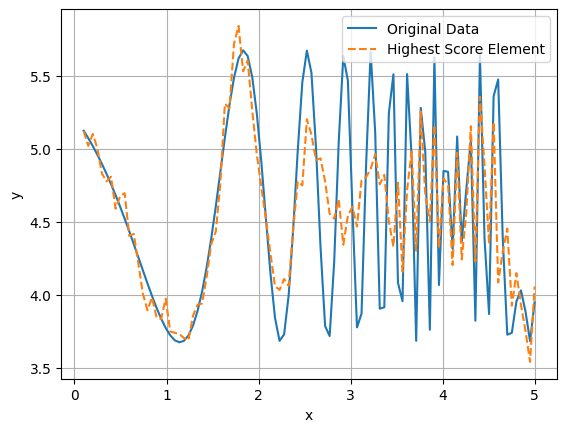

Function 18
params[0] * np.sin(params[1] * x) + params[2] * x + params[3] * np.tanh(params[4] * x) + params[5] * (np.exp(-params[6] * (x - params[7])**2) - 0.5) + params[8] * np.exp(-params[9] * x + params[10] * np.sin(params[11] * x))
[ 0.00843475  1.19082324 -0.01646104  0.19583384  2.01880389  0.2083374
  0.43190238 -0.17784898  2.89665334  2.04172262  0.30644785 -1.57700396]
-5.4261889204099134e-08


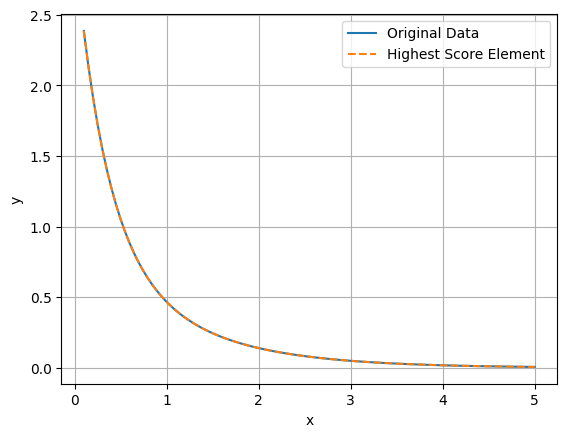

Function 19
params[0]*(x**params[1]) + np.sin(params[2]*x + params[3]) + params[4]*np.exp(-params[5]*x)*params[6]*np.cos(params[7]*x) + params[8]*np.sin(params[9]*x) + params[10]*(x**params[11]) + np.cos(params[12]*x + params[13])*params[14]*np.exp(-params[15]*x) + params[16]*np.sin(params[17]*x) - params[18]*(x**params[19]) + params[20]*(np.cos(params[21]*x + params[22]) + np.sin(params[23]*x))*(params[24]*(x**params[25]) + params[26]*(np.exp(-params[27]*x) - x)) + params[28]*(params[29]*params[30]*x + params[31])**2 + params[32]
[-1.17016507e-04 -1.14884513e+00  1.28401770e+00  3.15440965e+00
  2.88211676e-03  2.81596912e+00  1.82266856e+00  6.36557401e-01
  4.96327008e-06  1.80126386e+00  1.00001897e+00 -1.99999582e+00
  2.14955965e-01 -5.34741698e-01  3.57053716e+00  7.50673959e-01
  9.79508946e-01  1.28706346e+00  1.31253470e+00  9.56219336e-01
  3.46774049e+00 -3.73623746e-02  3.40417902e+00  3.70097141e-01
  1.75140601e+00  1.00887582e+00  1.67782154e+00  2.75838150e-01
  5.1428

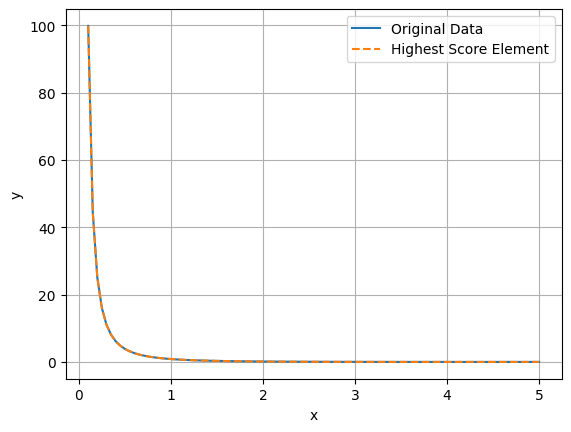

In [9]:
for index in range(len(res_list)):
    print(f"Function {index}")
    y = funcs[index](xVals)
    res = res_list[index]
    highest_score_element = max((item for sublist in res for item in sublist), key=lambda item: item['score'])
    print(highest_score_element['ansatz'])
    print(highest_score_element['params'])
    print(highest_score_element['score'])

    # Extract the parameters and the ansatz function from the highest_score_element
    params = highest_score_element['params']
    ansatz = highest_score_element['ansatz']

    # Define the ansatz function
    def ansatz_function(x, params):
        return eval(ansatz)

    # Plot the original data
    plt.plot(xVals, y, label='Original Data')

    # Plot the highest score element
    plt.plot(xVals, ansatz_function(xVals, params), label='Highest Score Element', linestyle='--')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
# print compute times in minutes and seconds 
for time in compute_times:
    minutes = int(time // 60)
    seconds = int(time % 60)
    print(f"Compute time: {minutes} minutes and {seconds} seconds")

Compute time: 46 minutes and 24 seconds
Compute time: 2 minutes and 14 seconds
Compute time: 1 minutes and 54 seconds
Compute time: 6 minutes and 11 seconds
Compute time: 1 minutes and 54 seconds
Compute time: 3 minutes and 10 seconds
Compute time: 1 minutes and 48 seconds
Compute time: 3 minutes and 3 seconds
Compute time: 3 minutes and 15 seconds
Compute time: 8 minutes and 48 seconds
Compute time: 1 minutes and 28 seconds
Compute time: 2 minutes and 15 seconds
Compute time: 1 minutes and 53 seconds
Compute time: 2 minutes and 32 seconds
Compute time: 1 minutes and 30 seconds
Compute time: 3 minutes and 31 seconds
Compute time: 3 minutes and 43 seconds
Compute time: 36 minutes and 25 seconds
Compute time: 3 minutes and 22 seconds
Compute time: 4 minutes and 4 seconds


In [11]:
all_results = [res_list, compute_times]
# Save the results to a file
import pickle
with open(f'results_{model}.pkl', 'wb') as f:
    pickle.dump(all_results, f)